# <div align="center">CM4</div>


###  4.1 Required Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from numpy import mean
from numpy import std
from sklearn import preprocessing,metrics

### 4.2 Load dataset and assign column names to each feature

Removed rows from dataset which have **/t** or **extra spaces** via **error_bad_lines = False**. There are no missing values in dataset as well. Except target feature all features have float datatype.

For target feature dataset have 3 integer values for varieties of wheat :

- target = 1 --> **"Kama"**
- target = 2 --> **"Rosa"**
- target = 3 --> **"Canadian"**

In [12]:
df = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines = False, warn_bad_lines =True)
df.columns = ['area', 'perimeter','compactness', 'length_kernel', 'width_kernel', 'asymmetry_coeff', 'length_of_kernel_groove', 'target']
df.dropna(inplace=True)
df.head()

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


### 4.3 Extracting features and label from dataset

x variable contains all features values and y variable contains all target values.


In [13]:
x = df.iloc[:, :-1].values

y = df.iloc[:, 7].values

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state = None)

### 4.4 Applying 10-fold validation on dataset 



**KFold validation :**

- Split data into train/test split.
- Split dataset into k consecytive folds.
- Each shuffle is use as a validation set, where k-1 remaining folds form the training set.


In [16]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
kfold.get_n_splits(x_train)

10

### 4.5 Naive Bayes classifier and Gaussian Naive Bayes classifier


**Naive Bayes :**

- The Naive Bayesian classifier is based on Bayes’ theorem with the independence assumptions between predictors. 
- A Naive Bayesian model is easy to build, with no complicated iterative parameter estimation which makes it particularly useful for very large datasets. 
- Despite its simplicity, the Naive Bayesian classifier often does surprisingly well and is widely used because it often outperforms more sophisticated classification methods.

**Gaussian Naive Bayes classifier:**

- In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution.
- The Gaussian in the GNB classifier is a probability distribution, and has the effect of comparing neural activation to the means and variances of activation in different stimulus conditions.

**Parameters :**

- var_smoothing (float): Portion of the largest variance of all features that is added to variances for calculation stability. Default value is 1e-9.

In [17]:
var_smoothing = [1e-10,1e-9, 1e-5, 1e-3, 1e-1]
acc4= []
for i in var_smoothing:
    model = GaussianNB(var_smoothing = i)    
    model.fit(x_train, y_train)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    print(f'var_smoothing = {i} ==> Accuracy =  {mean(scores)} and Standard Devaition = {std(scores)}')
    acc4 = np.append(acc4, mean(scores))

var_smoothing = 1e-10 ==> Accuracy =  0.9110294117647058 and Standard Devaition = 0.05385245124588399
var_smoothing = 1e-09 ==> Accuracy =  0.9110294117647058 and Standard Devaition = 0.05385245124588399
var_smoothing = 1e-05 ==> Accuracy =  0.9110294117647058 and Standard Devaition = 0.05385245124588399
var_smoothing = 0.001 ==> Accuracy =  0.9110294117647058 and Standard Devaition = 0.05385245124588399
var_smoothing = 0.1 ==> Accuracy =  0.9169117647058822 and Standard Devaition = 0.05971747207131458


### 4.5.1 Accuracy vs smoothing value for Gaussian Naive Bayes classifier.


Text(0, 0.5, 'Accuracy')

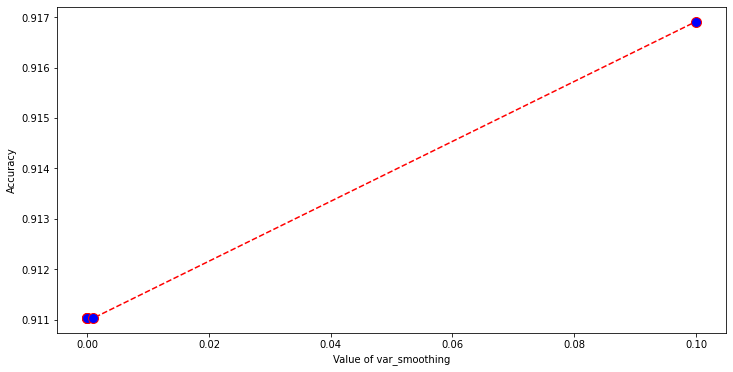

In [18]:
plt.figure(figsize=(12,6))
plt.plot(var_smoothing,acc4, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Value of var_smoothing')
plt.ylabel('Accuracy')


### 4.6 The impact of the smoothing parameter in Gaussian Naive Bayes classifier

- In the context of Naive Bayes, assuming a Gaussian distribution is essentially giving more weights to the samples closer to the distribution mean.
- The variable, var_smoothing, artificially adds a user-defined value ( In above case  1e-10, 1e-9, 1e-5 and 1e-1) to the distribution's variance (whose default value is derived from the training data set).
- This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean.

### 4.7 In order to achieve highest accuracy in GaussianNB, model should use  var_smoothing = 1e-1 as it achieve highest accuracy in train set 

In [19]:
model4 = GaussianNB(var_smoothing = 1e-1)

model4 = model4.fit(x_train,y_train)
y_pred = model4.predict(x_test)
print(f"Number of boosting stages : 150 ==> Accuracy:",metrics.accuracy_score(y_test, y_pred))

Number of boosting stages : 150 ==> Accuracy: 0.8666666666666667
